<a href="https://colab.research.google.com/github/gouthamkesav/ml-alg/blob/main/Copy_of_Copy_of_Unit_1_LinReg_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Linear Regression 


In [ ]:
#Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Give sample input data and its associated ground truth
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

In [ ]:
#Plot the given data for visualization
plt.scatter(x,y)
plt.title('Distribution of Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
#Size of the input data
n = np.size(x)
print(n)

10


In [ ]:
#Compute the mean of input and output 
x_mean = np.mean(x)
y_mean = np.mean(y)
print(x_mean,y_mean)

In [ ]:
#Compute the numerator for finding the slope
num = np.array([])
for i in range(n):
  diff = np.multiply((x[i]-x_mean),(y[i]-y_mean))
  num = np.append(num,diff)
print('The individual product of difference in datapoints are:\n',num)
num = np.sum(num)
print('The sum of product of differences are:\n',num)

In [ ]:
#Compute the denominator for finding the slope
den = np.array([])
for i in range(n):
  sq_diff = np.square((x[i]-x_mean))
  den = np.append(den,sq_diff)
print('The individual square of differences of datapoints are:\n',den)
den = np.sum(den)
print('The sum of squared differences are:\n',den)

In [ ]:
#Slope computation
beta_1 = num/den
print('The value of slope is:',beta_1)

In [ ]:
#Intercept computation
beta_0 = y_mean - (beta_1*x_mean)
print('The value of intercept is:\n',beta_0)

In [ ]:
#Get the values of estimated model parameters
print("The Estimated coefficients are:\n beta_0 = {}\n beta_1 = {}".format(beta_0, beta_1))

In [ ]:
#Linear Regression Fit/Model 
y_pred = beta_0 + (beta_1 * x)
print(y_pred)

In [ ]:
#Plot the regression line 
plt.scatter(x,y, marker = "x", color = "r")
plt.plot(x,y_pred, color = "g")
plt.title('Distribution of Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
#Give a sample input value for prediction
#y_pred = beta_0 + (beta_1 * x)
y_pred = beta_0 + (beta_1 * 0.5)
print(y_pred)

Linear Regression with Dataset split

In [ ]:
#import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Give input data and its associated ground truth
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
print(x, type(x), np.shape(x)) # 1D array
print(y, type(y), np.shape(y))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'> (10,)
[ 1  3  2  5  7  8  8  9 10 12] <class 'numpy.ndarray'> (10,)


In [ ]:
#Reshape into a 2D array
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1,1)
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]).reshape(-1,1)
print(x, np.shape(x))
print(y, np.shape(y))

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] (10, 1)
[[ 1]
 [ 3]
 [ 2]
 [ 5]
 [ 7]
 [ 8]
 [ 8]
 [ 9]
 [10]
 [12]] (10, 1)


In [ ]:
#Split the dataset into train and test set
#x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.5)
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[4]
 [1]
 [2]
 [8]
 [9]
 [0]
 [3]]
[[6]
 [5]
 [7]]
[[ 7]
 [ 3]
 [ 2]
 [10]
 [12]
 [ 1]
 [ 5]]
[[8]
 [8]
 [9]]


In [ ]:
model = LinearRegression()

In [ ]:
#Fit the model with training data
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Obtain the model parameters
beta_1 = model.coef_
beta_0 = model.intercept_
print('The linear regression model parameters are:\n Slope: {}\n Intercept:{}'.format(beta_1,beta_0))

The linear regression model parameters are:
 Slope: [[1.18145161]]
 Intercept:[1.15725806]


In [ ]:
#Make predictions with test data
y_pred = model.predict(x_test)
#print(y_pred,y_test)

In [ ]:
#Print the values of performance metrics
print('The Mean Squared error is ',mean_squared_error(y_test,y_pred))
print('The coefficient of determination is ',r2_score(y_test,y_pred))

The Mean Squared error is  0.372772502601457
The coefficient of determination is  -0.6774762617065566


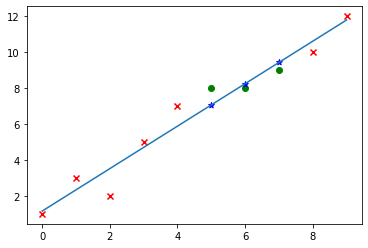

In [ ]:
#Visualize as a graph
plt.scatter(x_train,y_train, color = 'r', marker = 'x')
plt.scatter(x_test,y_test, color = "g", marker = "o")
plt.plot(x,beta_0 + (beta_1*x))
plt.scatter(x_test,y_pred, color = "b", marker = "*")
plt.show()


In [ ]:
#Make a prediction with a sample input data
model.predict([[0.5]])


array([[1.74798387]])

### Logistic Regression

In [ ]:
#Import the required libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from collections import Counter


In [ ]:
#Create dataset and plot it and see
X, y = make_blobs(n_samples = 1000, centers = 2, random_state=1)
#print(X)
#print(y)
pyplot.scatter(X[:,0],X[:,1])
pyplot.show()

In [ ]:
#print the shape of input and output
print(X.shape, y.shape)

In [ ]:
#count the number of occurrences of instances
label = Counter(y)
print(label)

In [ ]:
#display some samples from dataset
for i in range(10):
	print(X[i], y[i])
print(type(X))


In [ ]:
#Split the input dataset as per class label
x1=np.array([])
x2=np.array([])
for i in range(1000):
  if y[i]==0:
    x1 = np.append(x1, X[i])
  else:
    x2 = np.append(x2,X[i])
print(x1,x2, type(x1),type(x2), np.shape(x1),np.shape(x2))


In [ ]:
#Reshape the dataset into 2D array
x1 = x1.reshape(500,2)
x2 = x2.reshape(500,2)
print(x1)
print(x2)
print(x1.shape,x2.shape)

In [ ]:
#Plot the split dataset
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.legend(label)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,y)

LogisticRegression()

In [ ]:
#Test the model with a sample datapoint
W=np.array([[-1.5,2]])
print(W, type(W))


In [ ]:
pred=model.predict(W)

In [ ]:
print(pred)

Logistic Regression with Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.5)
x_train, x_test, y_train, y_test = train_test_split(X,y)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

In [ ]:
print(x_train.size, x_train.shape)
print(x_test.size, x_test.shape)
print(y_train.size, y_train.shape)
print(y_test.size, y_test.shape)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

In [ ]:
import seaborn as sns

In [ ]:
# create heatmap
class_names=[0,1] # name  of classes
sns.heatmap((cnf_matrix), annot=True, cmap = "Reds", fmt = 'g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print('The accuracy is ', accuracy)

In [ ]:
precision = metrics.precision_score(y_test, y_pred)
print('The precision is ', precision)

In [ ]:
recall = metrics.recall_score(y_test,y_pred)
print('The Recall value is ', recall)

In [ ]:
f1 = metrics.f1_score(y_test, y_pred)
print('The F1 Score is ',f1)

In [ ]:
y_pred_proba = model.predict_proba(x_test)[:,1]
print(y_pred_proba)
print(y_pred_proba.shape)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
plt.plot(fpr,tpr)
plt.show()